<a href="https://colab.research.google.com/github/azernik/semeval_2025_task1/blob/main/admire_results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [76]:
# # for downloading the train zip from Drive
# !pip install -q gdown

# import gdown

# # download taskA file from Adam's Drive (public) and unzip
# file_id = "105JdQU_u98w_xSYaNNSj-r4RsyTPXZEF"
# url = f"https://drive.google.com/uc?id={file_id}"
# gdown.download(url, "taskA.zip", quiet=True)
# ! unzip -q - taskA.zip

import os
import pandas as pd

# define locations
taska_folder = "train"
taska_tsv_filename = "subtask_a_train.tsv"

# load data
df_train = pd.read_csv(f"{taska_folder}/{taska_tsv_filename}", delimiter="\t")

# fix incorrect row in dataset
df_train.loc[df_train['compound'] == "pain in the neck", 'sentence_type'] = 'literal'

In [77]:
# for downloading the RESULTS zip from Drive
# !pip install -q gdown

# import gdown

# Download the zip file from Google Drive
# gdown.download("https://drive.google.com/uc?id=1SujbY7GC6cvlcLCe_IVhbSoDhtM2qS0u", "results.zip", quiet=False)

# # Unzip the downloaded file
# import zipfile

# with zipfile.ZipFile("results.zip", "r") as zip_ref:
#     zip_ref.extractall("results")  # Extract into a folder named "predictions"

# Verify the files were extracted
import os
print("Extracted files:")
print(os.listdir("results"))

Extracted files:
[]


### Load data

In [78]:
results_file = 'experiment_results.csv'
results_file_open_clip = "experiment_results_openclip.csv"
combined_preds_file = 'combined_predictions.csv'

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data while avoiding unnecessary columns
results_df = pd.read_csv(results_file).reset_index(drop=True)
results_df_open_clip = pd.read_csv(results_file_open_clip).reset_index(drop=True)
# results_df_open_clip["model"] = results_df_open_clip["model"].str.replace("open_clip", "open_clip_1")

# merge the two dataframes
# results_df = pd.merge(results_df, results_df_open_clip, how='outer')

preds_df = pd.read_csv(combined_preds_file).reset_index(drop=True)

# Drop the 'experiment' = 'GPT Prompt 4 with sentence if predicted literal	' row
results_df = results_df[~results_df['experiment'].str.contains('GPT Prompt 4 with sentence if predicted literal')]

# preds_df 没有sentence_type, 所以我们需要从df_train中获取
preds_df = preds_df.merge(df_train[['sentence', 'sentence_type']], on='sentence', how='left')
preds_df


,index,compound,sentence,ground_truth_order,predicted_order,top1_score,spearman_score,weighted_score,confidence_scores,base_model,model_name,experiment,sentence_type
0,0,elbow grease,It took a lot of elbow grease to get the old e...,"[0, 2, 1, 4, 3]","[2, 1, 3, 4, 0]",0,0.1,0.1,"[63.469, 29.078, 6.902, 0.405, 0.133]",CLIP,ViT-B/32,Baseline (Sentences),idiomatic
1,1,night owl,"It's a constant battle for us, as he is a morn...","[1, 3, 2, 0, 4]","[3, 0, 2, 1, 4]",0,0.3,0.2,"[91.812, 6.859, 0.782, 0.537, 0.039]",CLIP,ViT-B/32,Baseline (Sentences),idiomatic
2,2,heart of gold,Even the somewhat seedy failed private eye has...,"[2, 1, 0, 4, 3]","[4, 2, 3, 1, 0]",0,-0.6,0.0,"[96.438, 2.957, 0.259, 0.216, 0.147]",CLIP,ViT-B/32,Baseline (Sentences),idiomatic
3,3,agony aunt,ESA's Space Weather Office is like Europe's st...,"[3, 2, 0, 1, 4]","[3, 4, 2, 1, 0]",1,-0.2,0.5,"[80.688, 9.344, 5.938, 3.959, 0.034]",CLIP,ViT-B/32,Baseline (Sentences),idiomatic
4,4,shrinking violet,"This aged, rich wine is no shrinking violet wi...","[3, 2, 0, 1, 4]","[0, 1, 2, 4, 3]",0,-0.2,0.0,"[49.219, 45.5, 2.393, 1.938, 0.944]",CLIP,ViT-B/32,Baseline (Sentences),idiomatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,65,cold turkey,"When you're serving cold turkey, take out only...","[1, 4, 0, 2, 3]","[1, 0, 4, 2, 3]",1,-0.6,0.5,"[97.116, 1.797, 1.083, 0.003, 0.001]",open_clip,ViT-B-32,GPT Prompt 4 with sentence if predicted literal,literal
2796,66,low-hanging fruit,Howard said there was a lot of low-hanging fru...,"[3, 1, 4, 2, 0]","[3, 0, 1, 2, 4]",1,-0.3,0.5,"[94.649, 2.656, 1.732, 0.885, 0.078]",open_clip,ViT-B-32,GPT Prompt 4 with sentence if predicted literal,idiomatic
2797,67,busy bee,There's no need to worry if you're a busy bee ...,"[2, 1, 4, 0, 3]","[1, 2, 0, 4, 3]",0,-0.7,0.0,"[65.107, 34.192, 0.481, 0.162, 0.058]",open_clip,ViT-B-32,GPT Prompt 4 with sentence if predicted literal,idiomatic
2798,68,wet blanket,Wet blankets draped over neighboring cabins pr...,"[1, 4, 2, 0, 3]","[1, 4, 3, 0, 2]",1,0.9,0.8,"[99.914, 0.086, 0.0, 0.0, 0.0]",open_clip,ViT-B-32,GPT Prompt 4 with sentence if predicted literal,literal


### Baseline + text-to-text data

In [80]:
# Define new models
text_to_text_model_1 = "Text-to-Text: CLIP ViT-B/32 Text Encoder vs. Image Captions"
text_to_text_model_2 = "Text-to-Text: CLIP ViT-B/32 Text Encoder vs. Summarized Image Captions (LLama2)"

# Define the new data cleanly
text_results_data = {
    "base_model": ["CLIP", "CLIP"],
    "model": [text_to_text_model_1, text_to_text_model_2],
    "experiment": ["Baseline (Sentences)", "Baseline (Sentences)"],
    "top1_accuracy": [0.2143, 0.2857],
    "average_spearman": [-0.0629, 0.0686],
    "average_weighted_accuracy": [0.2157, 0.2786]
}

# Create the DataFrame for new data
text_df = pd.DataFrame(text_results_data)

In [81]:
# Filter results for baselines
filtered_results_df_baseline_only = results_df[results_df['experiment'].isin(["Baseline (Sentences)", "NC-Only"])].reset_index(drop=True)

# Concatenate with new data
baseline_plus_text_df = pd.concat([filtered_results_df_baseline_only, text_df], ignore_index=True)

### Load fine-tuning data

In [82]:
finetuning_file = 'experiment_results_openclip.csv'
finetuning_df = pd.read_csv(finetuning_file).reset_index(drop=True)

In [83]:

finetuning_df["model"] = finetuning_df["model"].str.replace("ViT-B-32", "ViT-B-32_finetune")
finetuning_df

,base_model,model,experiment,top1_accuracy,average_spearman,average_weighted_accuracy
0,open_clip,ViT-B-32_finetune,Baseline (Sentences),0.742857,0.451429,0.612857
1,open_clip,ViT-B-32_finetune,NC-Only,0.400000,0.191429,0.334286
2,open_clip,ViT-B-32_finetune,GPT Prompt 1,0.714286,0.245714,0.530000
3,open_clip,ViT-B-32_finetune,GPT Prompt 2,0.757143,0.220000,0.544286
4,open_clip,ViT-B-32_finetune,GPT Prompt 3,0.628571,0.282857,0.487143
5,open_clip,ViT-B-32_finetune,GPT Prompt 3 with nc for literal,0.257143,0.222857,0.252857
6,open_clip,ViT-B-32_finetune,GPT Prompt 3 with sentence for literal,0.257143,0.222857,0.252857


In [84]:
base_model_mapping = {
    "openclip": "open_clip"
}

experiment_mapping = {
    "baseline_sentences": "Baseline (Sentences)",
    "gpt_prompt_3": "GPT Prompt 3",
    "gpt_prompt_3_with_sentence_for_literal": "GPT Prompt 3 with sentence for literal",
    "gpt_prompt_2": "GPT Prompt 2",
    "gpt_prompt_1": "GPT Prompt 1"
}

# Standardize the columns
# finetuning_df['base_model'] = finetuning_df['base_model'].map(base_model_mapping)
# finetuning_df['experiment'] = finetuning_df['experiment'].map(experiment_mapping)

finetuning_df

,base_model,model,experiment,top1_accuracy,average_spearman,average_weighted_accuracy
0,open_clip,ViT-B-32_finetune,Baseline (Sentences),0.742857,0.451429,0.612857
1,open_clip,ViT-B-32_finetune,NC-Only,0.400000,0.191429,0.334286
2,open_clip,ViT-B-32_finetune,GPT Prompt 1,0.714286,0.245714,0.530000
3,open_clip,ViT-B-32_finetune,GPT Prompt 2,0.757143,0.220000,0.544286
4,open_clip,ViT-B-32_finetune,GPT Prompt 3,0.628571,0.282857,0.487143
5,open_clip,ViT-B-32_finetune,GPT Prompt 3 with nc for literal,0.257143,0.222857,0.252857
6,open_clip,ViT-B-32_finetune,GPT Prompt 3 with sentence for literal,0.257143,0.222857,0.252857


In [85]:
# Combine results_df and finetuning_df
results_plus_finetuning_df = pd.concat([results_df, finetuning_df], ignore_index=True)
results_plus_finetuning_df = results_plus_finetuning_df.drop(columns=['Unnamed: 0'], errors='ignore')

In [86]:
open_clip_df = results_plus_finetuning_df[results_plus_finetuning_df['base_model'] == 'open_clip']
open_clip_df = open_clip_df[open_clip_df['experiment'] != "NC-Only"]
open_clip_df = open_clip_df[open_clip_df['experiment'] != "GPT Prompt 3 with nc for literal"]

open_clip_df.dropna(inplace=True)
open_clip_df

,base_model,model,experiment,top1_accuracy,average_spearman,average_weighted_accuracy
4,open_clip,ViT-B-32,Baseline (Sentences),0.442857,0.170000,0.348571
14,open_clip,ViT-B-32,GPT Prompt 1,0.642857,0.192857,0.470000
19,open_clip,ViT-B-32,GPT Prompt 2,0.614286,0.222857,0.445714
24,open_clip,ViT-B-32,GPT Prompt 3,0.600000,0.201429,0.452857
34,open_clip,ViT-B-32,GPT Prompt 3 with sentence for literal,0.257143,0.160000,0.230000
35,open_clip,ViT-B-32_finetune,Baseline (Sentences),0.742857,0.451429,0.612857
37,open_clip,ViT-B-32_finetune,GPT Prompt 1,0.714286,0.245714,0.530000
38,open_clip,ViT-B-32_finetune,GPT Prompt 2,0.757143,0.220000,0.544286
39,open_clip,ViT-B-32_finetune,GPT Prompt 3,0.628571,0.282857,0.487143
41,open_clip,ViT-B-32_finetune,GPT Prompt 3 with sentence for literal,0.257143,0.222857,0.252857


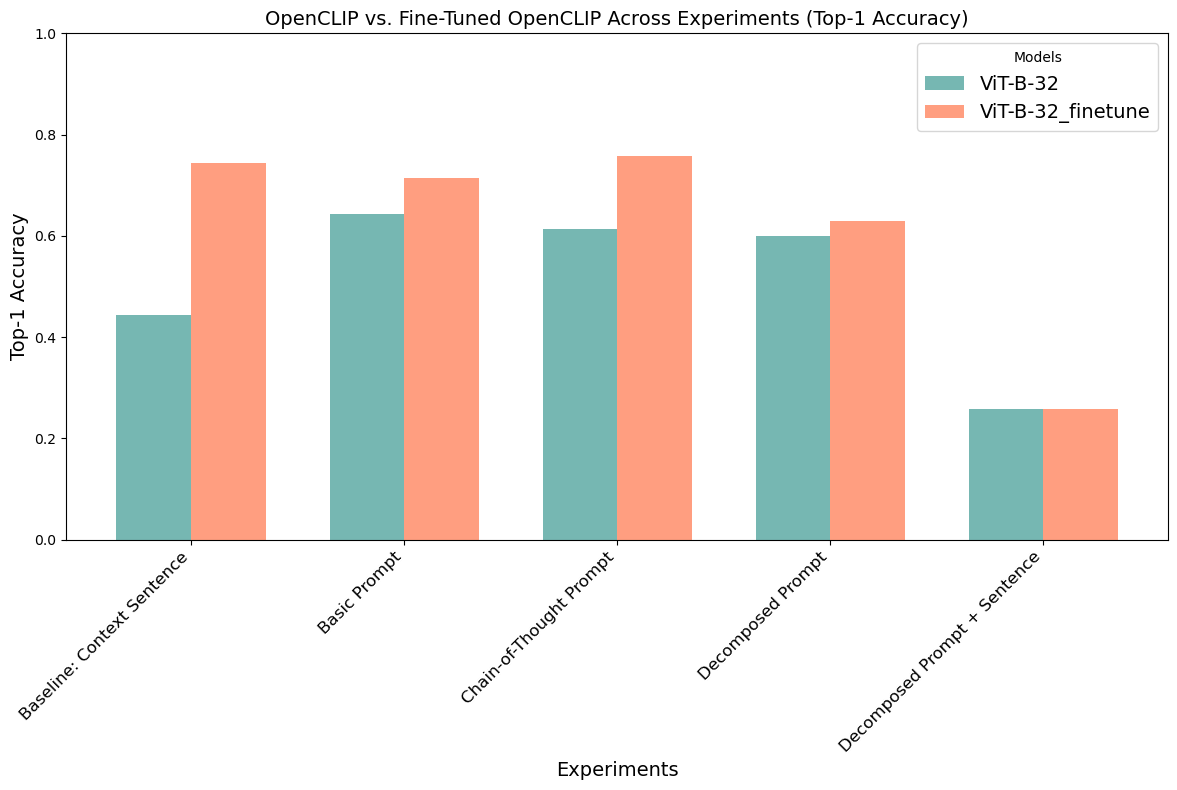

In [57]:
# Define colors for models
model_colors = {
    "ViT-B-32": "#76b7b2",  # Teal for the original model
    # "ViT-B-32_finetune": "#ff9966",
    "ViT-B-32_finetune": "#ff9e80",
}

# Refined experiment display names and order
experiment_order = [
    "Baseline (Sentences)",
    "GPT Prompt 1",
    "GPT Prompt 2",
    "GPT Prompt 3",
    "GPT Prompt 3 with sentence for literal"
]

experiment_display_names = {
    "Baseline (Sentences)": "Baseline: Context Sentence",
    "GPT Prompt 1": "Basic Prompt",
    "GPT Prompt 2": "Chain-of-Thought Prompt",
    "GPT Prompt 3": "Decomposed Prompt",
    "GPT Prompt 3 with sentence for literal": "Decomposed Prompt + Sentence"
}

# Add display names to the dataframe
open_clip_df['display_experiment'] = open_clip_df['experiment'].map(experiment_display_names)

# Ensure the order of experiments in the plot
open_clip_df['display_experiment'] = pd.Categorical(
    open_clip_df['display_experiment'], categories=[experiment_display_names[exp] for exp in experiment_order], ordered=True
)

# Pivot data for grouped bar chart
pivot_data = open_clip_df.pivot(index='display_experiment', columns='model', values='top1_accuracy')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size as needed
bar_width = 0.35  # Adjust bar width
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    ax.bar(
        x + i * bar_width, pivot_data[model], bar_width,
        label=model, color=model_colors[model]
    )

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Top-1 Accuracy', fontsize=14)
ax.set_ylim(0, 1)  # Set y-axis range from 0 to 1
ax.set_title('OpenCLIP vs. Fine-Tuned OpenCLIP Across Experiments (Top-1 Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=14)

plt.tight_layout()
plt.savefig('viz/openclip_vs_finetuned_top1.png')  # Optional: Save the plot
plt.show()


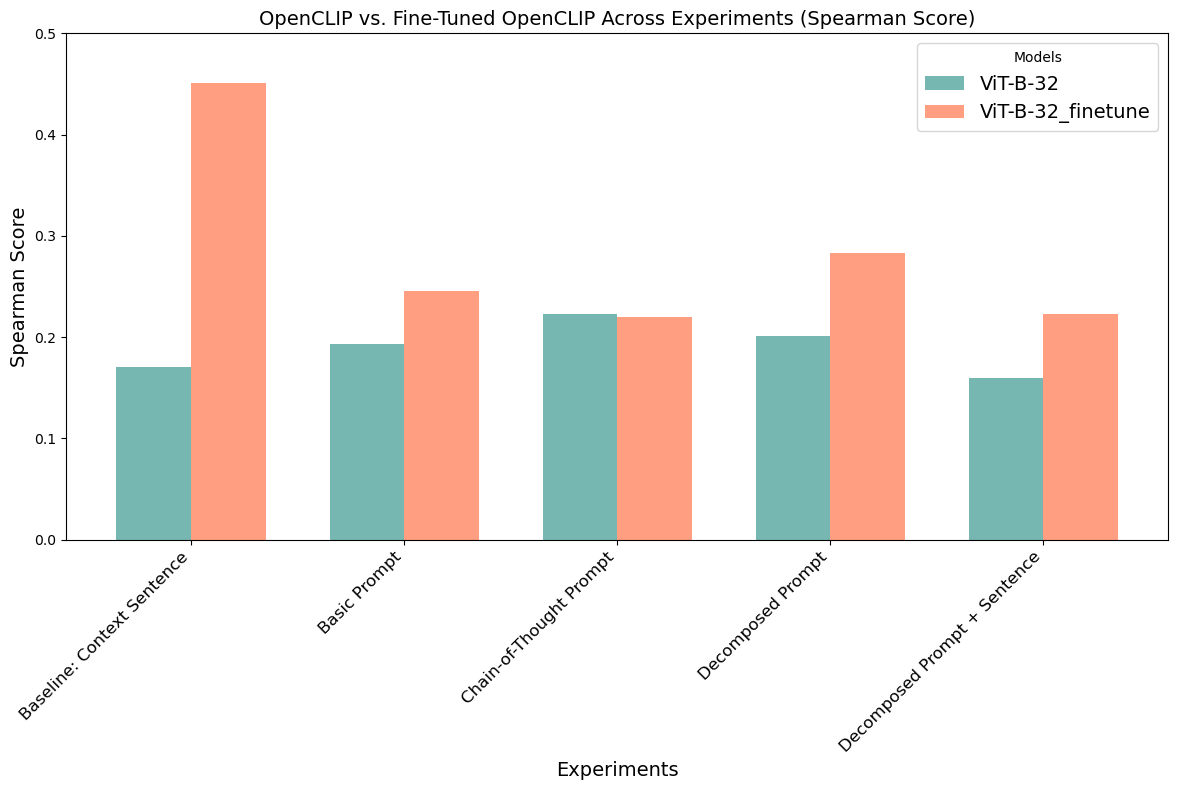

In [58]:
# Pivot data for grouped bar chart
pivot_data = open_clip_df.pivot(index='display_experiment', columns='model', values='average_spearman')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size as needed
bar_width = 0.35  # Adjust bar width
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    ax.bar(
        x + i * bar_width, pivot_data[model], bar_width,
        label=model, color=model_colors[model]
    )

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Spearman Score', fontsize=14)
ax.set_ylim(0, 0.5)  # Set y-axis range from 0 to 1
ax.set_title('OpenCLIP vs. Fine-Tuned OpenCLIP Across Experiments (Spearman Score)', fontsize=14)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=14)

plt.tight_layout()
plt.savefig('viz/openclip_vs_finetuned_spearman.png')  # Optional: Save the plot
plt.show()


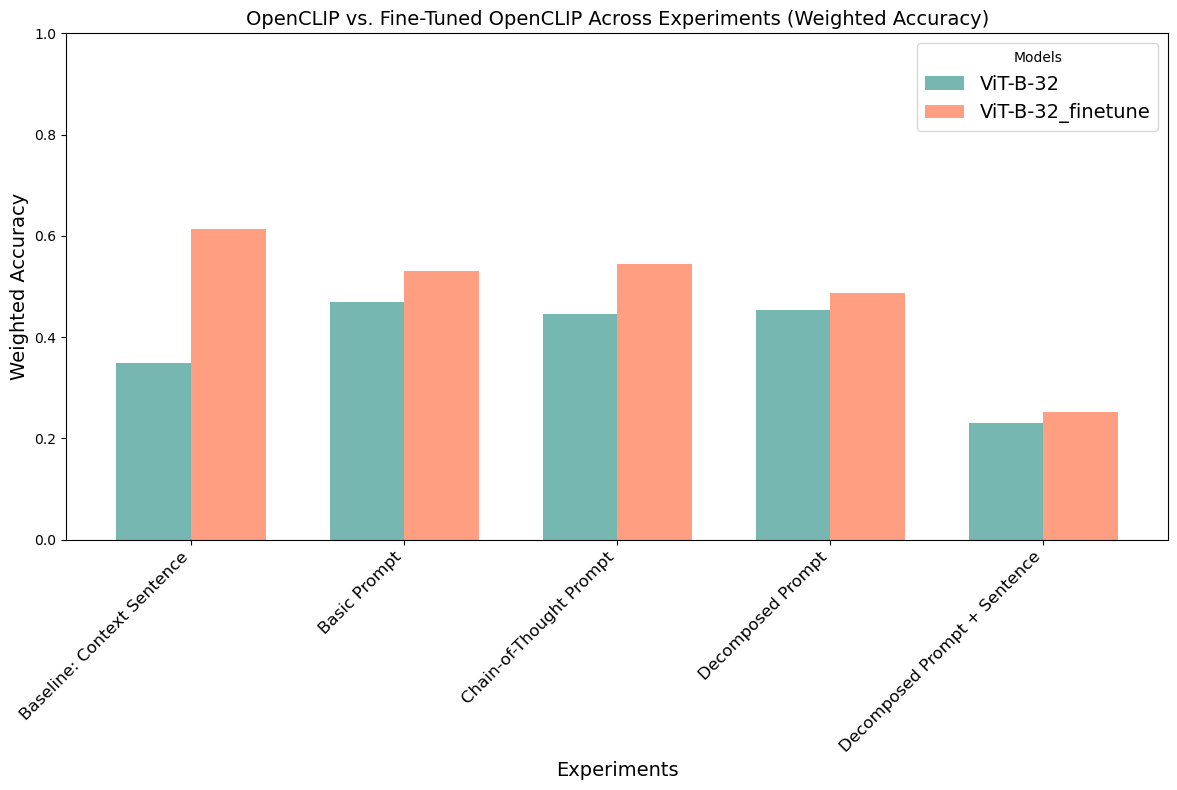

In [59]:
# Pivot data for grouped bar chart
pivot_data = open_clip_df.pivot(index='display_experiment', columns='model', values='average_weighted_accuracy')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size as needed
bar_width = 0.35  # Adjust bar width
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    ax.bar(
        x + i * bar_width, pivot_data[model], bar_width,
        label=model, color=model_colors[model]
    )

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Weighted Accuracy', fontsize=14)
ax.set_ylim(0, 1)  # Set y-axis range from 0 to 1
ax.set_title('OpenCLIP vs. Fine-Tuned OpenCLIP Across Experiments (Weighted Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=14)

plt.tight_layout()
plt.savefig('viz/openclip_vs_finetuned_weighted.png')
plt.show()


### Analysis

In [60]:
# Define model display names and refined colors
models = [
    {"base_model": "CLIP", "model": "ViT-B/32", "display_name": "CLIP ViT-B/32", "color": "#4e79a7"},  # Blue
    {"base_model": "CLIP", "model": "ViT-L/14", "display_name": "CLIP ViT-L/14", "color": "#f28e2b"},  # Orange
    {"base_model": "CLIP", "model": "RN50x64", "display_name": "CLIP RN50x64", "color": "#59a14f"},    # Green
    {"base_model": "Align", "model": "Base", "display_name": "Align Base", "color": "#e15759"},        # Red
    {"base_model": "open_clip", "model": "ViT-B-32", "display_name": "OpenCLIP ViT-B/32", "color": "#76b7b2"},  # Teal

    {"base_model": "CLIP", "model": text_to_text_model_1, "display_name": text_to_text_model_1, "color": "#9d7660"},  # Warm brown
    {"base_model": "CLIP", "model": text_to_text_model_2, "display_name": text_to_text_model_2, "color": "#8c7aa9"}   # Soft purple

]

# Refined experiment colors
experiments = [
    {"experiment": "Baseline (Sentences)", "display_name": "Baseline: Context Sentence", "color": "#9c755f"},  # Brown
    {"experiment": "NC-Only", "display_name": "Baseline: NC-Only", "color": "#bab0ac"},                # Gray
    {"experiment": "GPT Prompt 1", "display_name": "Basic Prompt", "color": "#ff9da7"},                # Soft Pink
    {"experiment": "GPT Prompt 2", "display_name": "Chain-of-Thought Prompt", "color": "#ffbf74"},     # Soft Orange
    {"experiment": "GPT Prompt 3", "display_name": "Decomposed Prompt", "color": "#59c6d1"},           # Cyan
    {"experiment": "GPT Prompt 3 with nc for literal", "display_name": "Decomposed Prompt + NC", "color": "#4e79a7"},  # Blue
    {"experiment": "GPT Prompt 3 with sentence for literal", "display_name": "Decomposed Prompt + Sentence", "color": "#f28e2b"}  # Orange
]

# Create mappings for experiments and models
experiment_display_names = {e["experiment"]: e["display_name"] for e in experiments}
experiment_colors = {e["display_name"]: e["color"] for e in experiments}
model_colors = {m["display_name"]: m["color"] for m in models}
model_display_names = {m["model"]: m["display_name"] for m in models}

# Replace model names and experiments in the data with display names
results_df['display_model'] = results_df['model'].map(model_display_names)
results_df['display_experiment'] = results_df['experiment'].map(experiment_display_names)

### BASELINE (BY EXPERIMENT)

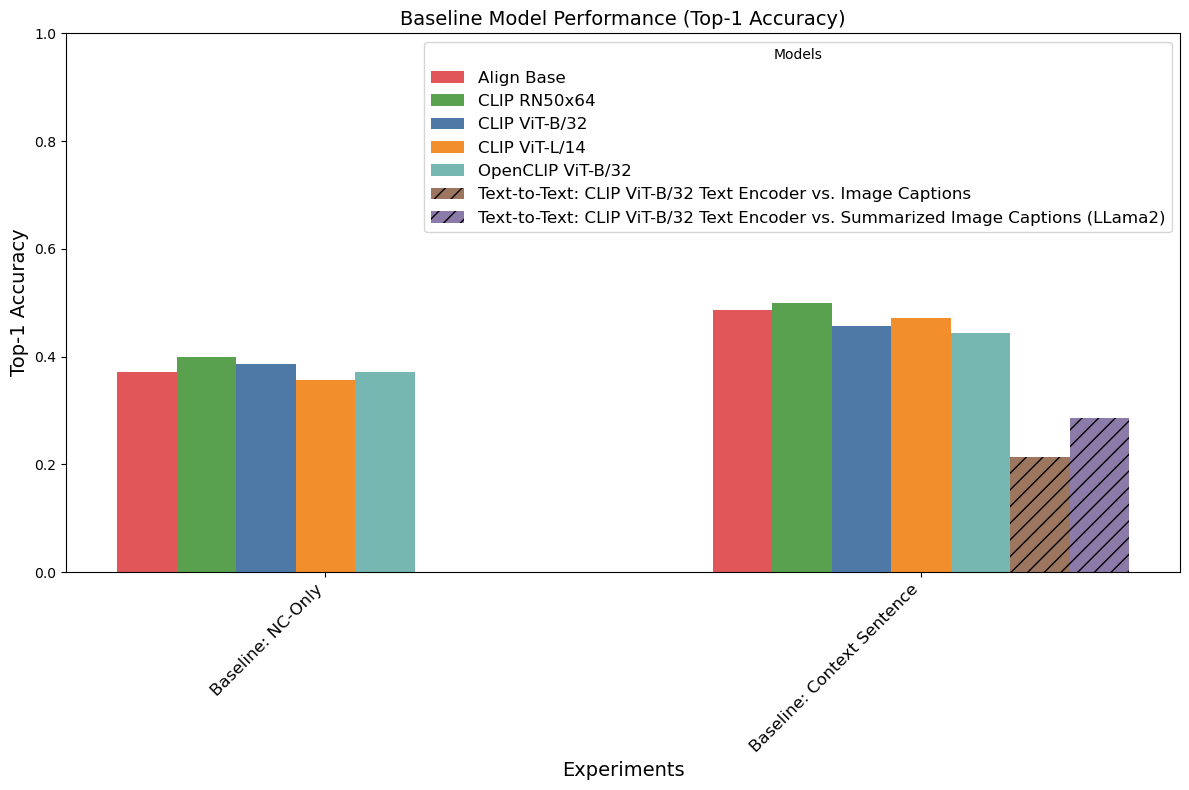

In [62]:
# BASELINE + TEXT-TO-TEXT (TOP1)

# Replace for baseline_df too
baseline_plus_text_df['display_model'] = baseline_plus_text_df['model'].map(model_display_names)
baseline_plus_text_df['display_experiment'] = baseline_plus_text_df['experiment'].map(experiment_display_names)

# Pivot data for grouped bar chart
pivot_data = baseline_plus_text_df.pivot(index='display_experiment', columns='display_model', values='top1_accuracy')

# Reorder index to make "Baseline: NC-Only" appear first
desired_order = ["Baseline: NC-Only", "Baseline: Context Sentence"] + \
                [exp for exp in pivot_data.index if exp not in ["Baseline: NC-Only", "Baseline: Context Sentence"]]
pivot_data = pivot_data.reindex(desired_order)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Increased height for more vertical space
bar_width = 0.05  # Narrow bar width
spacing = -0.5  # Negative values reduce spacing; adjust as needed
x = np.arange(len(pivot_data.index)) * (1 + spacing)  # Apply the new spacing

# Hatching patterns for text-to-text models
hatching_patterns = {
    text_to_text_model_1: '//',  # Diagonal stripes
    text_to_text_model_2: '//'   # Cross-hatching
}

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    for j, experiment in enumerate(pivot_data.index):
        if model in hatching_patterns:  # Apply hatching for specific models
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model], hatch=hatching_patterns[model])
        else:
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])  # Normal bars

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Top-1 Accuracy', fontsize=14)
ax.set_ylim(0, 1)
ax.set_title('Baseline Model Performance (Top-1 Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data.columns) - 1) / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=12)

plt.tight_layout()
# plt.savefig('viz/baseline_top1.png')
plt.show()


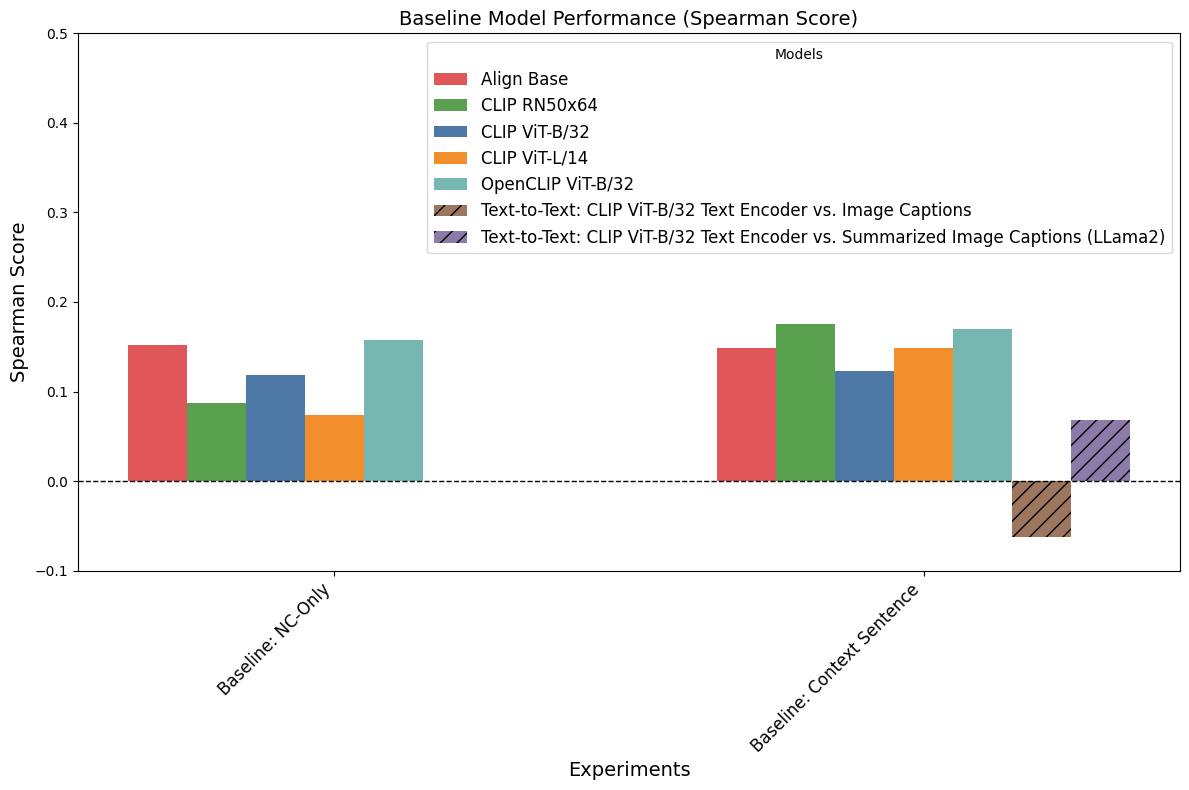

In [ ]:
# BASELINE + TEXT-TO-TEXT (TOP1)

# Replace for baseline_df too
baseline_plus_text_df['display_model'] = baseline_plus_text_df['model'].map(model_display_names)
baseline_plus_text_df['display_experiment'] = baseline_plus_text_df['experiment'].map(experiment_display_names)

# Pivot data for grouped bar chart
pivot_data = baseline_plus_text_df.pivot(index='display_experiment', columns='display_model', values='average_spearman')

# Reorder index to make "Baseline: NC-Only" appear first
desired_order = ["Baseline: NC-Only", "Baseline: Context Sentence"] + \
                [exp for exp in pivot_data.index if exp not in ["Baseline: NC-Only", "Baseline: Context Sentence"]]
pivot_data = pivot_data.reindex(desired_order)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Increased height for more vertical space
bar_width = 0.05  # Narrow bar width
spacing = -0.5  # Negative values reduce spacing; adjust as needed
x = np.arange(len(pivot_data.index)) * (1 + spacing)  # Apply the new spacing

# Hatching patterns for text-to-text models
hatching_patterns = {
    text_to_text_model_1: '//',  # Diagonal stripes
    text_to_text_model_2: '//'   # Cross-hatching
}

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    for j, experiment in enumerate(pivot_data.index):
        if model in hatching_patterns:  # Apply hatching for specific models
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model], hatch=hatching_patterns[model])
        else:
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])  # Normal bars

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Spearman Score', fontsize=14)
ax.set_ylim(-0.1, 0.5)
ax.axhline(0, color='black', linewidth=1, linestyle='--')  # Add x-axis line at y=0
ax.set_title('Baseline Model Performance (Spearman Score)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data.columns) - 1) / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=12)

plt.tight_layout()
plt.savefig('viz/baseline_spearman.png')
plt.show()


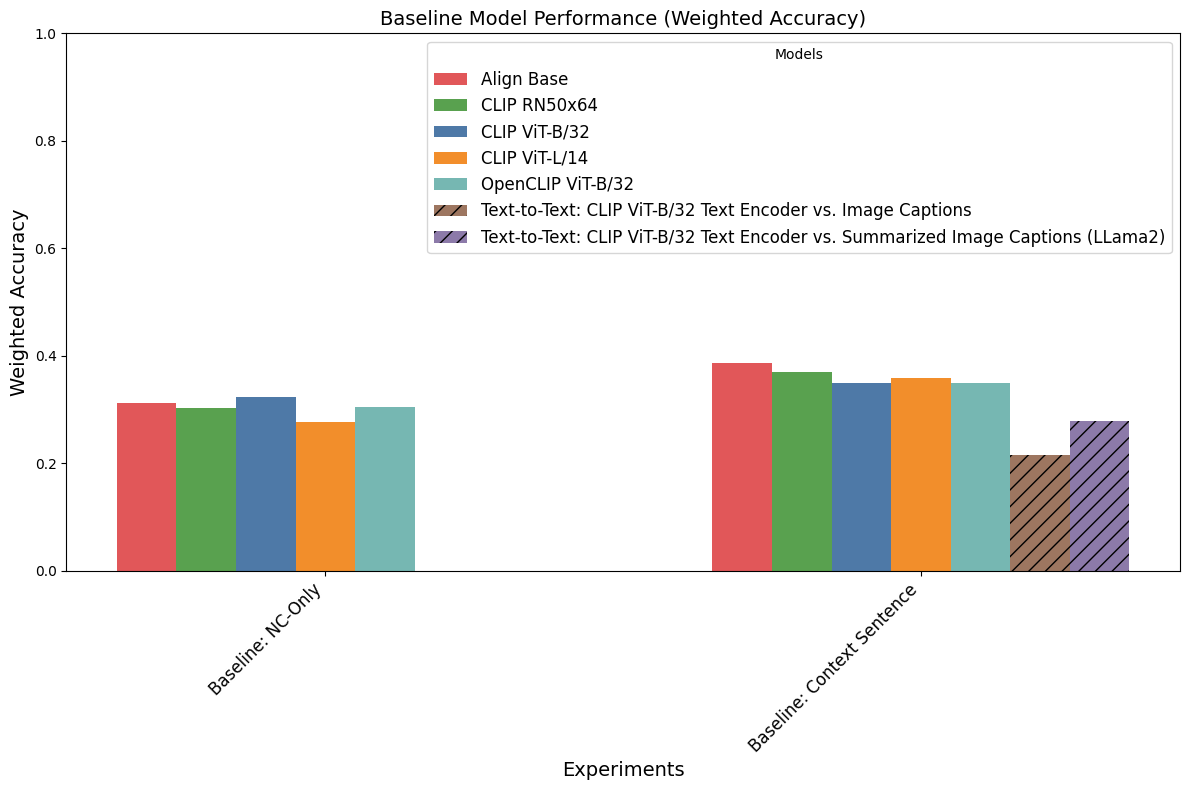

In [ ]:
# BASELINE + TEXT-TO-TEXT (TOP1)

# Replace for baseline_df too
baseline_plus_text_df['display_model'] = baseline_plus_text_df['model'].map(model_display_names)
baseline_plus_text_df['display_experiment'] = baseline_plus_text_df['experiment'].map(experiment_display_names)

# Pivot data for grouped bar chart
pivot_data = baseline_plus_text_df.pivot(index='display_experiment', columns='display_model', values='average_weighted_accuracy')

# Reorder index to make "Baseline: NC-Only" appear first
desired_order = ["Baseline: NC-Only", "Baseline: Context Sentence"] + \
                [exp for exp in pivot_data.index if exp not in ["Baseline: NC-Only", "Baseline: Context Sentence"]]
pivot_data = pivot_data.reindex(desired_order)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))  # Increased height for more vertical space
bar_width = 0.05  # Narrow bar width
spacing = -0.5  # Negative values reduce spacing; adjust as needed
x = np.arange(len(pivot_data.index)) * (1 + spacing)  # Apply the new spacing

# Hatching patterns for text-to-text models
hatching_patterns = {
    text_to_text_model_1: '//',  # Diagonal stripes
    text_to_text_model_2: '//'   # Cross-hatching
}

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    for j, experiment in enumerate(pivot_data.index):
        if model in hatching_patterns:  # Apply hatching for specific models
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model], hatch=hatching_patterns[model])
        else:
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])  # Normal bars

# Formatting
ax.set_xlabel('Experiments', fontsize=14)
ax.set_ylabel('Weighted Accuracy', fontsize=14)
ax.set_ylim(0, 1)
ax.set_title('Baseline Model Performance (Weighted Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data.columns) - 1) / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(title='Models', fontsize=12)

plt.tight_layout()
plt.savefig('viz/baseline_weighted.png')
plt.show()


#### CLUSTER BY EXPERIMENT

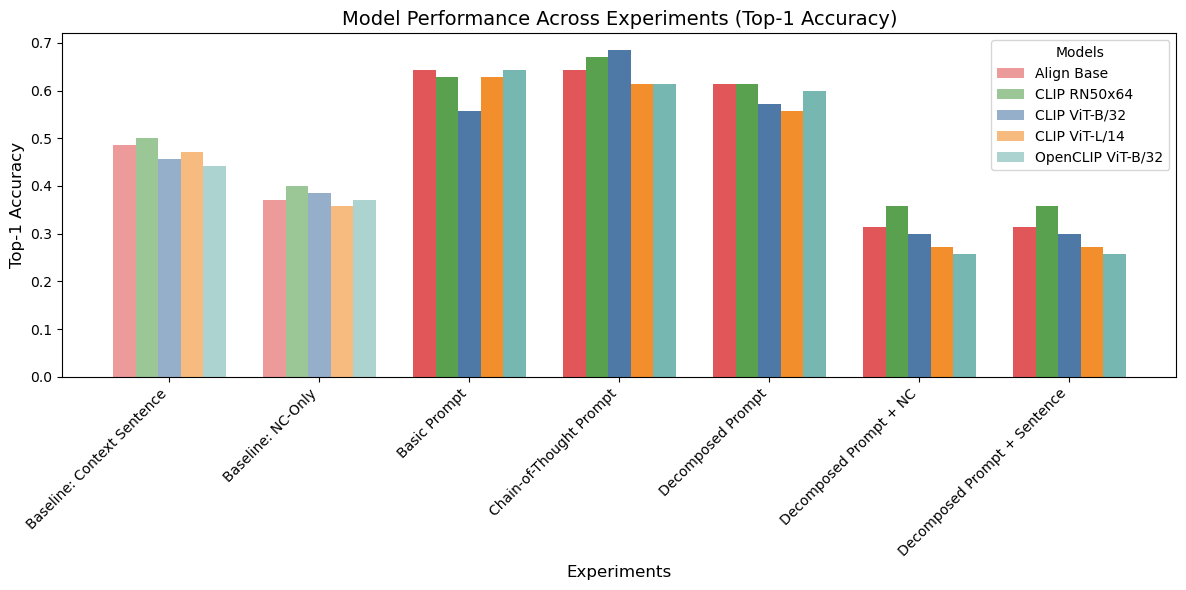

In [64]:
# COMPARE MODELS ACROSS EXPERIMENTS (TOP-1)

# Pivot data for grouped bar chart
pivot_data = results_df.pivot(index='display_experiment', columns='display_model', values='top1_accuracy')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(pivot_data.index))  # Number of experiments

# Define indices for baseline experiments
baseline_indices = [0, 1]  # Indices for "NC-Only" and "Sentences"

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data.columns):
    for j, experiment in enumerate(pivot_data.index):
        if j in baseline_indices:
            # Adjust texture for baseline bars
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",  # Only add legend once per model
                   color=model_colors[model], alpha=0.6) #, hatch='//')  # Lighten and add hatching
        else:
            ax.bar(x[j] + i * bar_width, pivot_data[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])  # Normal bars

# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Model Performance Across Experiments (Top-1 Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data.columns) - 1) / 2)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Models', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/experiments_comparison_bar_top1.png')
plt.show()


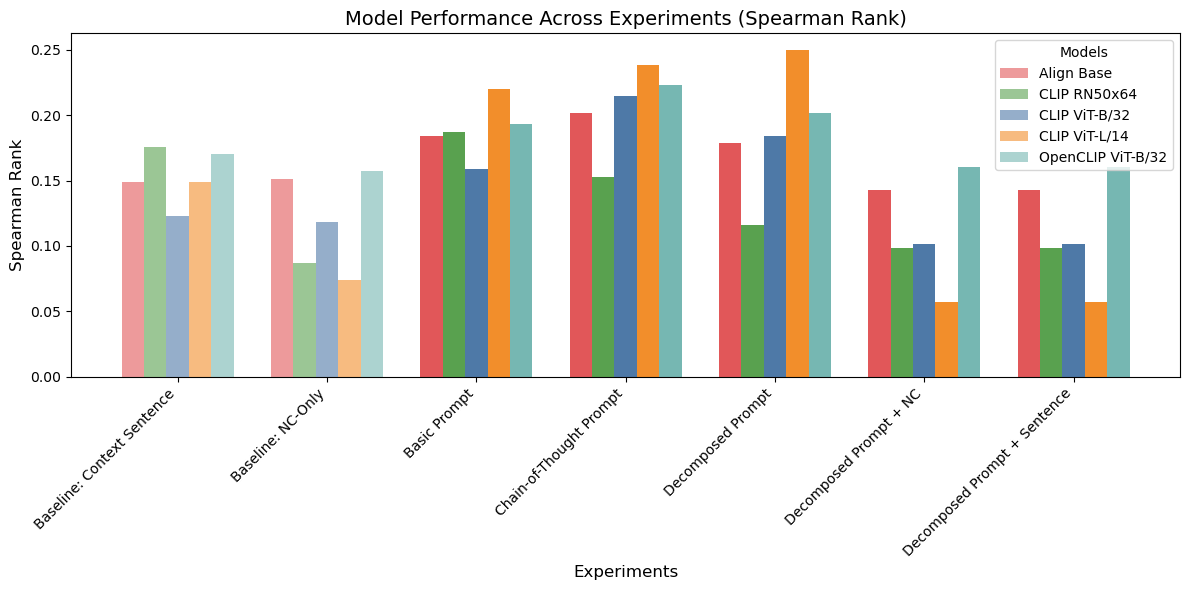

In [66]:
# COMPARE MODELS ACROSS EXPERIMENTS (SPEARMAN)

# Pivot data for grouped bar chart (Spearman Rank)
pivot_data_spearman = results_df.pivot(index='display_experiment', columns='display_model', values='average_spearman')

# Plot for Spearman Rank
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(pivot_data_spearman.index))  # Number of experiments

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data_spearman.columns):
    for j, experiment in enumerate(pivot_data_spearman.index):
        if j in baseline_indices:  # Apply changes for baseline bars
            ax.bar(x[j] + i * bar_width, pivot_data_spearman[model][experiment], bar_width,
                   label=model if j == 0 else "",  # Add legend once per model
                   color=model_colors[model], alpha=0.6) #, hatch='//')  # Lightened and hatched bars
        else:  # Regular bars for non-baseline experiments
            ax.bar(x[j] + i * bar_width, pivot_data_spearman[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])


# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Spearman Rank', fontsize=12)
ax.set_title('Model Performance Across Experiments (Spearman Rank)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data_spearman.columns) - 1) / 2)
ax.set_xticklabels(pivot_data_spearman.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Models', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/experiments_comparison_bar_spearman.png')
plt.show()


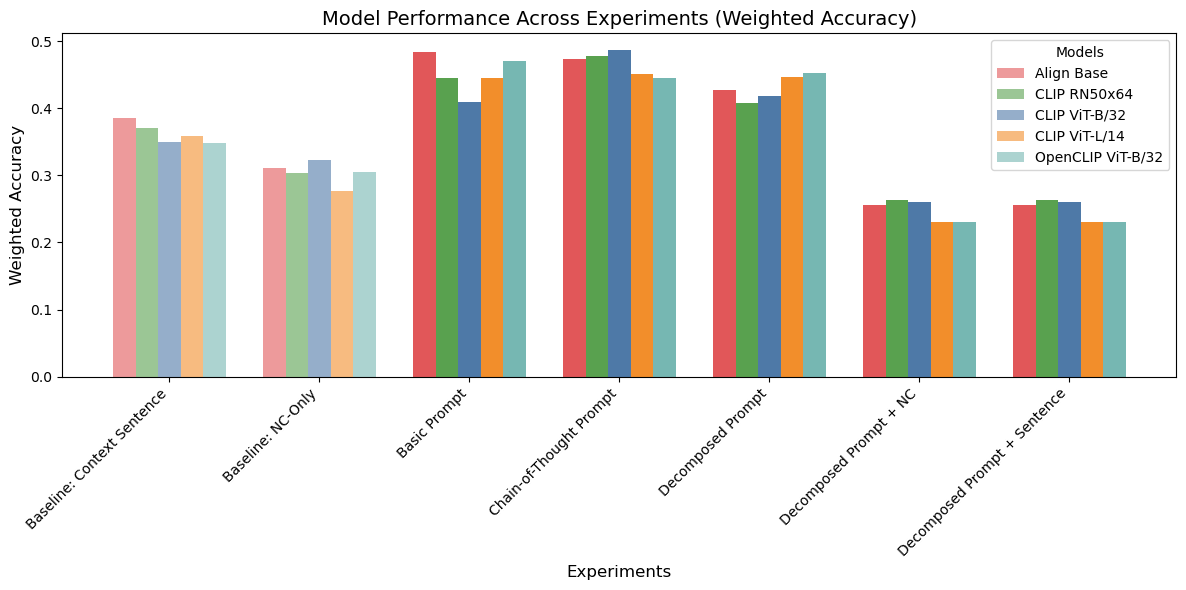

In [67]:
# Pivot data for grouped bar chart (Weighted Accuracy)
pivot_data_weighted = results_df.pivot(index='display_experiment', columns='display_model', values='average_weighted_accuracy')

# Plot for Weighted Accuracy
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(pivot_data_weighted.index))  # Number of experiments

# Plot each model as a grouped bar
for i, model in enumerate(pivot_data_weighted.columns):
    for j, experiment in enumerate(pivot_data_weighted.index):
        if j in baseline_indices:  # Apply changes for baseline bars
            ax.bar(x[j] + i * bar_width, pivot_data_weighted[model][experiment], bar_width,
                   label=model if j == 0 else "",  # Add legend once per model
                   color=model_colors[model], alpha=0.6)#, hatch='//')  # Lightened and hatched bars
        else:  # Regular bars for non-baseline experiments
            ax.bar(x[j] + i * bar_width, pivot_data_weighted[model][experiment], bar_width,
                   label=model if j == 0 else "",
                   color=model_colors[model])


# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Weighted Accuracy', fontsize=12)
ax.set_title('Model Performance Across Experiments (Weighted Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data_weighted.columns) - 1) / 2)
ax.set_xticklabels(pivot_data_weighted.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Models', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/experiments_comparison_bar_weighted.png')
plt.show()


#### CLUSTER BY MODEL (LESS GOOD)

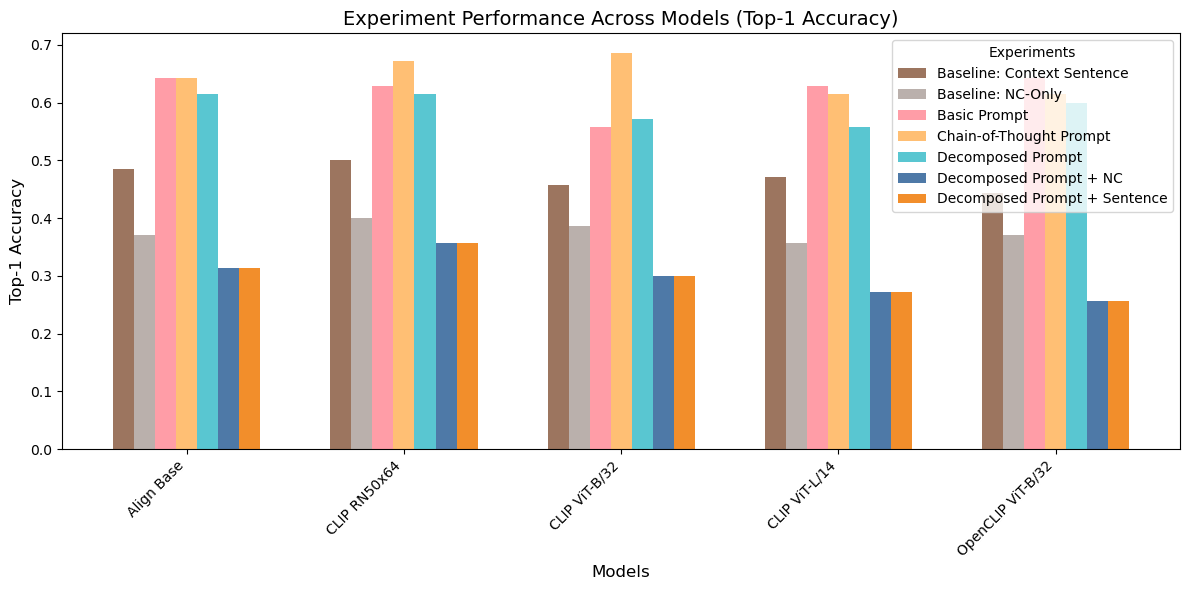

In [68]:
# Pivot data to cluster by model
pivot_data_model_top1 = results_df.pivot(index='display_model', columns='display_experiment', values='top1_accuracy')

# Adjust spacing
bar_width = 0.15
cluster_spacing = 0.5  # Extra space between clusters
x = np.arange(len(pivot_data_model_top1.index)) * (bar_width * len(pivot_data_model_top1.columns) + cluster_spacing)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each experiment as a grouped bar within each cluster
for i, experiment in enumerate(pivot_data_model_top1.columns):
    ax.bar(x + i * bar_width, pivot_data_model_top1[experiment], bar_width, label=experiment, color=experiment_colors[experiment])

# Formatting
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Top-1 Accuracy', fontsize=12)
ax.set_title('Experiment Performance Across Models (Top-1 Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data_model_top1.columns) - 1) / 2)
ax.set_xticklabels(pivot_data_model_top1.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Experiments', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/models_comparison_bar_top1.png')
plt.show()


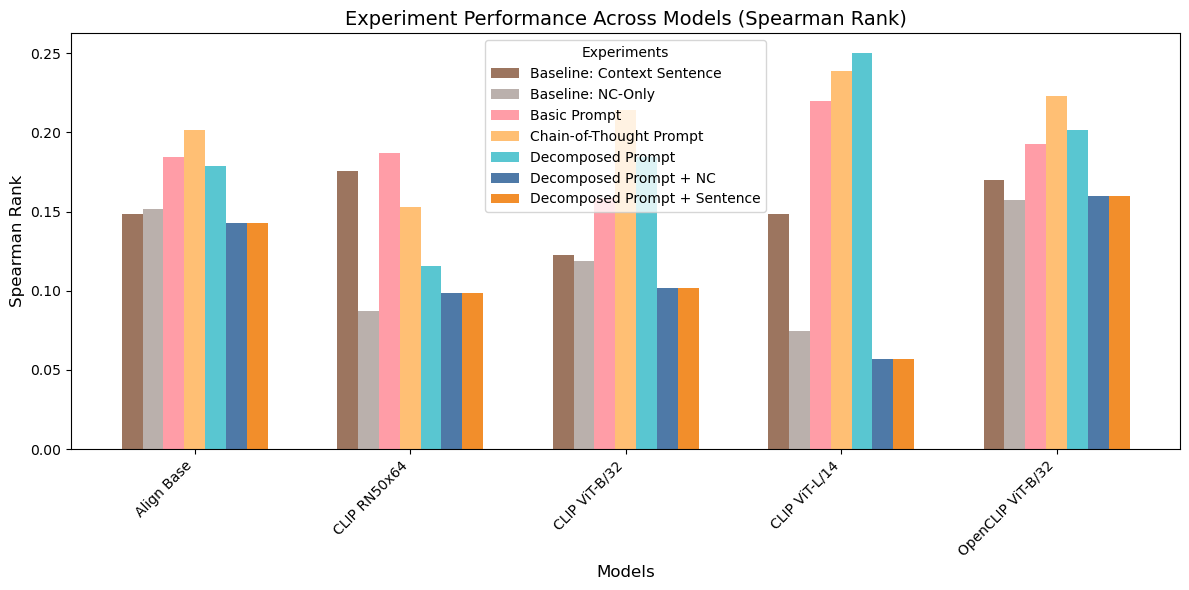

In [69]:
# Pivot data to cluster by model
pivot_data_model_spearman = results_df.pivot(index='display_model', columns='display_experiment', values='average_spearman')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
cluster_spacing = 0.5  # Extra space between clusters
x = np.arange(len(pivot_data_model_spearman.index)) * (bar_width * len(pivot_data_model_spearman.columns) + cluster_spacing)

# Plot each experiment as a grouped bar
for i, experiment in enumerate(pivot_data_model_spearman.columns):
    ax.bar(x + i * bar_width, pivot_data_model_spearman[experiment], bar_width, label=experiment, color=experiment_colors[experiment])

# Formatting
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Spearman Rank', fontsize=12)
ax.set_title('Experiment Performance Across Models (Spearman Rank)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data_model_spearman.columns) - 1) / 2)
ax.set_xticklabels(pivot_data_model_spearman.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Experiments', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/models_comparison_bar_spearman.png')
plt.show()


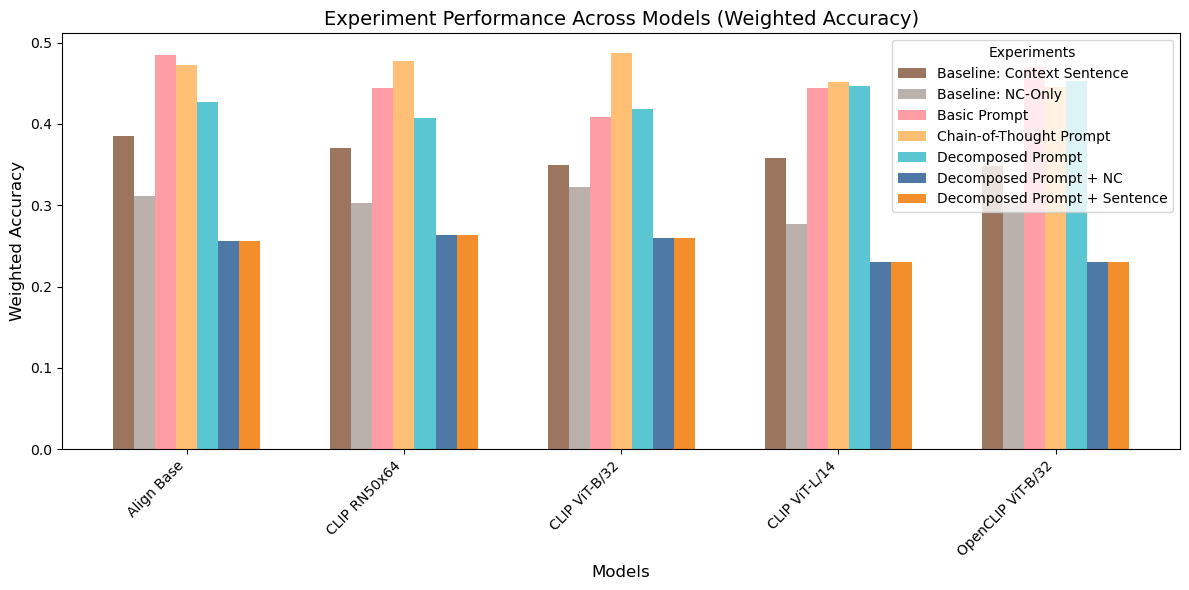

In [70]:
# Pivot data to cluster by model
pivot_data_model_weighted = results_df.pivot(index='display_model', columns='display_experiment', values='average_weighted_accuracy')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
cluster_spacing = 0.5
x = np.arange(len(pivot_data_model_weighted.index))  # Number of models
x = np.arange(len(pivot_data_model_weighted.index)) * (bar_width * len(pivot_data_model_weighted.columns) + cluster_spacing)

# Plot each experiment as a grouped bar
for i, experiment in enumerate(pivot_data_model_weighted.columns):
    ax.bar(x + i * bar_width, pivot_data_model_weighted[experiment], bar_width, label=experiment, color=experiment_colors[experiment])

# Formatting
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Weighted Accuracy', fontsize=12)
ax.set_title('Experiment Performance Across Models (Weighted Accuracy)', fontsize=14)
ax.set_xticks(x + bar_width * (len(pivot_data_model_weighted.columns) - 1) / 2)
ax.set_xticklabels(pivot_data_model_weighted.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Experiments', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/models_comparison_bar_weighted.png')
plt.show()


#### Literal vs. figurative

In [ ]:
# load tsv
df_test = pd.read_csv(f"{taska_folder}/subtask_a_test.tsv", delimiter="\t")

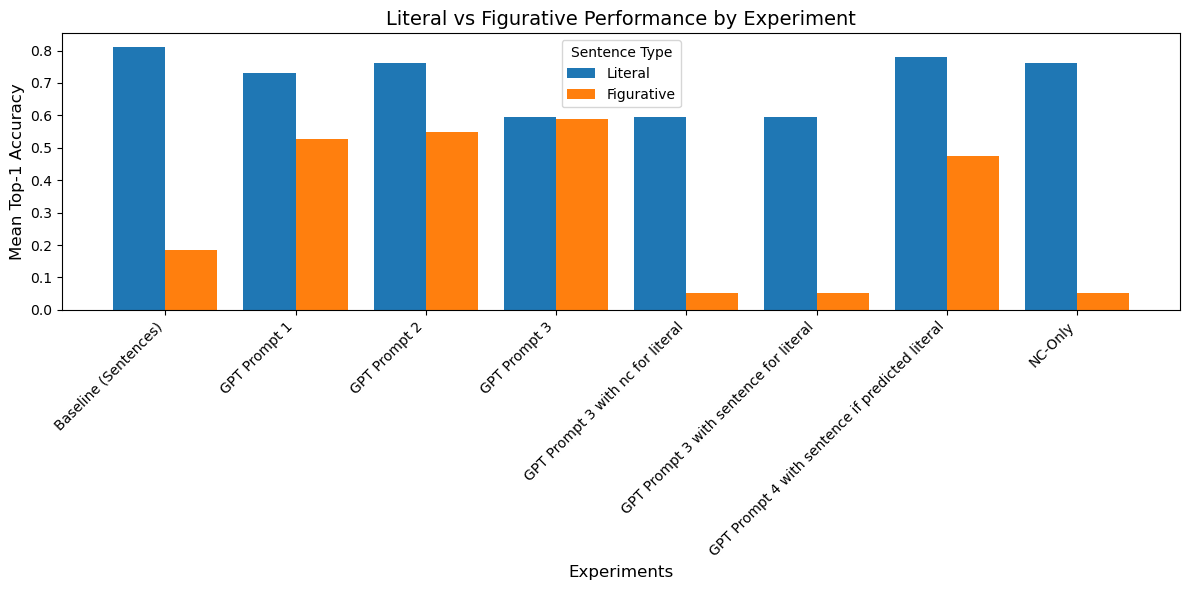

In [91]:
# LITERAL VS IDIOMATIC BY EXPERIMENT (NO MODEL BREAKDOWN)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load predictions data
# preds_df = pd.read_csv(combined_preds_file)

# Aggregate data by sentence type
grouped_data = preds_df.groupby(['base_model', 'model_name', 'experiment', 'sentence_type']).agg({'top1_score': 'mean'}).reset_index()

# Pivot data for plotting
pivot_data = grouped_data.pivot_table(index=['experiment'], columns='sentence_type', values='top1_score')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot literal and figurative bars
ax.bar(x - bar_width / 2, pivot_data['literal'], bar_width, label='Literal', color='#1f77b4')
ax.bar(x + bar_width / 2, pivot_data['idiomatic'], bar_width, label='Figurative', color='#ff7f0e')

# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Mean Top-1 Accuracy', fontsize=12)
ax.set_title('Literal vs Figurative Performance by Experiment', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Sentence Type', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz/literal_vs_fig_by_experiment_top1.png')
plt.show()


In [74]:
# LITERAL VS IDIOMATIC BY EXPERIMENT (NO MODEL BREAKDOWN)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load predictions data
# preds_df = pd.read_csv(combined_preds_file)

# Aggregate data by sentence type
grouped_data = preds_df.groupby(['base_model', 'model', 'experiment', 'sentence_type']).agg({'spearman_score': 'mean'}).reset_index()

# Pivot data for plotting
pivot_data = grouped_data.pivot_table(index=['experiment'], columns='sentence_type', values='spearman_score')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot literal and figurative bars
ax.bar(x - bar_width / 2, pivot_data['literal'], bar_width, label='Literal', color='#1f77b4')
ax.bar(x + bar_width / 2, pivot_data['idiomatic'], bar_width, label='Figurative', color='#ff7f0e')

# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Mean Spearman Score', fontsize=12)
ax.set_title('Literal vs Figurative Performance by Experiment', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Sentence Type', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz_plots/literal_vs_fig_by_experiment_spearman.png')
plt.show()


KeyError: 'model'

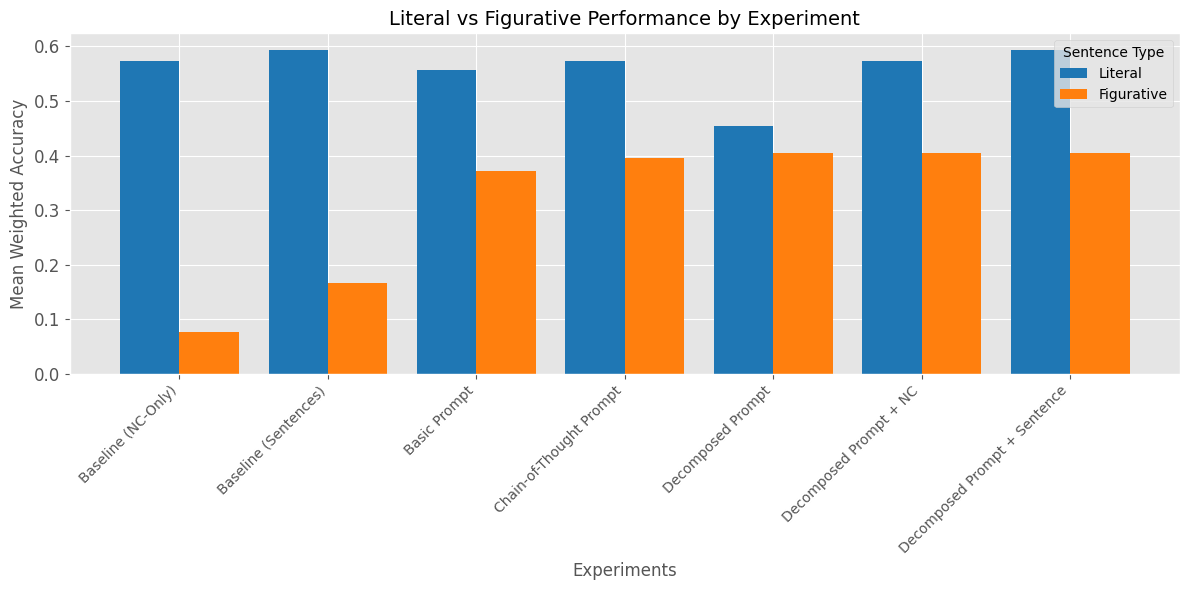

In [ ]:
# LITERAL VS IDIOMATIC BY EXPERIMENT (NO MODEL BREAKDOWN)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load predictions data
# preds_df = pd.read_csv(combined_preds_file)

# Aggregate data by sentence type
grouped_data = preds_df.groupby(['base_model', 'model', 'experiment', 'sentence_type']).agg({'weighted_score': 'mean'}).reset_index()

# Pivot data for plotting
pivot_data = grouped_data.pivot_table(index=['experiment'], columns='sentence_type', values='weighted_score')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(pivot_data.index))  # Number of experiments

# Plot literal and figurative bars
ax.bar(x - bar_width / 2, pivot_data['literal'], bar_width, label='Literal', color='#1f77b4')
ax.bar(x + bar_width / 2, pivot_data['idiomatic'], bar_width, label='Figurative', color='#ff7f0e')

# Formatting
ax.set_xlabel('Experiments', fontsize=12)
ax.set_ylabel('Mean Weighted Accuracy', fontsize=12)
ax.set_title('Literal vs Figurative Performance by Experiment', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Sentence Type', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz_plots/literal_vs_fig_by_experiment_weighted.png')
plt.show()


In [ ]:
# # LITERAL VS IDIOMATIC - SINGLE MODEL

# # Filter data for a single model (e.g., CLIP ViT-B/32)
# fixed_model = "OpenCLIP ViT-B/32"  # Change this to another model if needed
# filtered_data = grouped_data[grouped_data['unique_model'] == fixed_model]

# # Pivot data for plotting
# pivot_data = filtered_data.pivot_table(index=['experiment'], columns='sentence_type', values='top1_score')

# # Plot
# fig, ax = plt.subplots(figsize=(12, 6))
# bar_width = 0.35
# x = np.arange(len(pivot_data.index))  # Number of experiments

# # Plot literal and idiomatic bars
# ax.bar(x - bar_width / 2, pivot_data['literal'], bar_width, label='Literal', color='#1f77b4')
# ax.bar(x + bar_width / 2, pivot_data['idiomatic'], bar_width, label='Idiomatic', color='#ff7f0e')

# # Formatting
# ax.set_xlabel('Experiments', fontsize=12)
# ax.set_ylabel('Mean Top-1 Accuracy', fontsize=12)
# ax.set_title(f'Literal vs Idiomatic Performance for {fixed_model}', fontsize=14)
# ax.set_xticks(x)
# ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
# ax.legend(title='Sentence Type', fontsize=10)

# plt.tight_layout()
# plt.show()


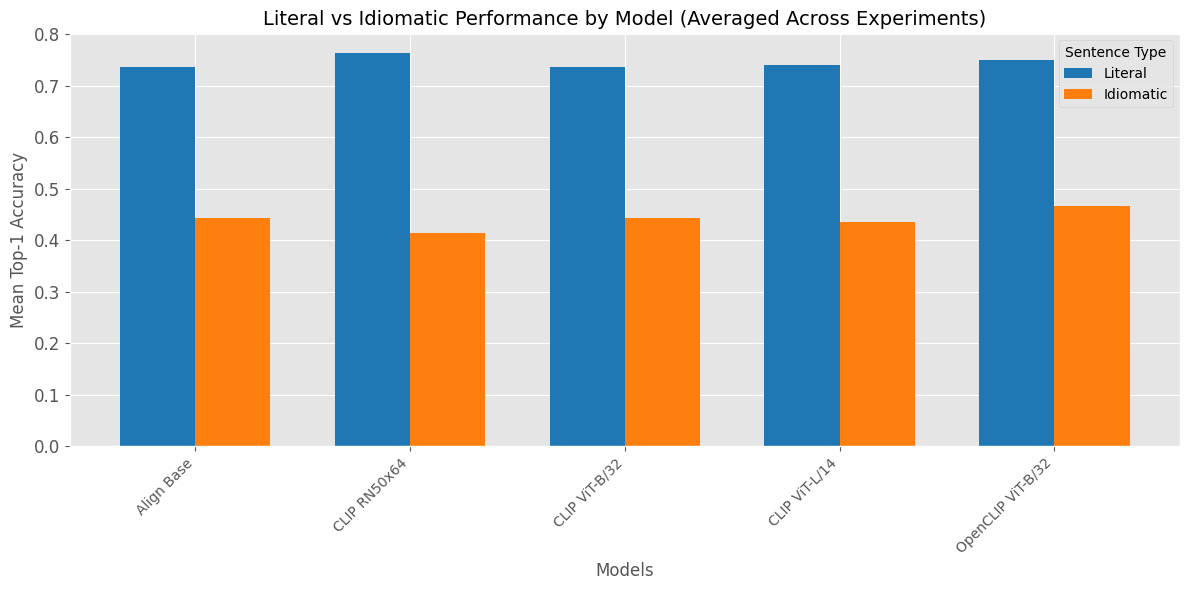

In [ ]:
# LITERAL VS IDIOMATIC BY MODEL (NO EXPERIMENT BREAKDOWN)

# Aggregate data by model and sentence type, averaging over experiments
grouped_data_by_model = preds_df.groupby(['base_model', 'model', 'sentence_type']).agg({'top1_score': 'mean'}).reset_index()

# Create a unique identifier for each model
grouped_data_by_model['unique_model'] = grouped_data_by_model['base_model'] + " " + grouped_data_by_model['model']

# Pivot data for plotting
pivot_data = grouped_data_by_model.pivot_table(index=['unique_model'], columns='sentence_type', values='top1_score')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(pivot_data.index))  # Number of models

# Plot literal and idiomatic bars
ax.bar(x - bar_width / 2, pivot_data['literal'], bar_width, label='Literal', color='#1f77b4')
ax.bar(x + bar_width / 2, pivot_data['idiomatic'], bar_width, label='Idiomatic', color='#ff7f0e')

# Formatting
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Mean Top-1 Accuracy', fontsize=12)
ax.set_title('Literal vs Idiomatic Performance by Model (Averaged Across Experiments)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Sentence Type', fontsize=10)

plt.tight_layout()
plt.savefig(f'viz_plots/literal_vs_fig_by_model_top1.png')
plt.show()


#### Confidence vs. accuracy

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Normalize distributions for literal and idiomatic
# plt.figure(figsize=(10, 6))

# # KDE (Smoothed Distribution)
# sns.kdeplot(data[data['sentence_type'] == 'literal']['mean_confidence'], label='Literal', color='#1f77b4', fill=True, alpha=0.3)
# sns.kdeplot(preds_df[preds_df['sentence_type'] == 'idiomatic']['mean_confidence'], label='Idiomatic', color='#ff7f0e', fill=True, alpha=0.3)

# # Statistical Highlights
# literal_mean = preds_df[preds_df['sentence_type'] == 'literal']['mean_confidence'].mean()
# idiomatic_mean = preds_df[preds_df['sentence_type'] == 'idiomatic']['mean_confidence'].mean()
# plt.axvline(literal_mean, color='#1f77b4', linestyle='--', label=f'Literal Mean ({literal_mean:.2f})')
# plt.axvline(idiomatic_mean, color='#ff7f0e', linestyle='--', label=f'Idiomatic Mean ({idiomatic_mean:.2f})')

# # Formatting
# plt.xlabel('Mean Confidence', fontsize=12)
# plt.ylabel('Density', fontsize=12)
# plt.title('Confidence Distribution by Sentence Type', fontsize=14)
# plt.legend(title='Sentence Type', fontsize=10)
# plt.tight_layout()
# plt.show()


#### Hunting outliers

In [94]:
# Ensure df_train has 'compound' and 'sentence' columns
if 'compound' not in df_train.columns or 'sentence' not in df_train.columns:
    raise ValueError("df_train must contain 'compound' and 'sentence' columns!")

# Aggregate performance metrics by compound
all_examples_avgs = preds_df.groupby('compound').agg({
    'top1_score': 'mean',      # Mean top-1 accuracy
    'spearman_score': 'mean',  # Mean Spearman rank
    'weighted_score': 'mean',  # Mean weighted accuracy
    'sentence_type': 'first'   # First occurrence (consistent for each compound)
}).reset_index()

# Merge with df_train to get the sentence
all_examples_avgs = all_examples_avgs.merge(df_train[['compound', 'sentence']], on='compound', how='left')

# Sort by top-1 accuracy (ascending)
all_examples_avgs = all_examples_avgs.sort_values(by='top1_score', ascending=True)

In [ ]:
# worst_examples.to_csv('all_examples_average_metrics.csv', index=False)

#### Score distributions for literal/figurative for all three metrics

/tmp/ipykernel_36409/3180276184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_examples_avgs, x='sentence_type', y=metric, palette=['#1f77b4', '#ff7f0e'])


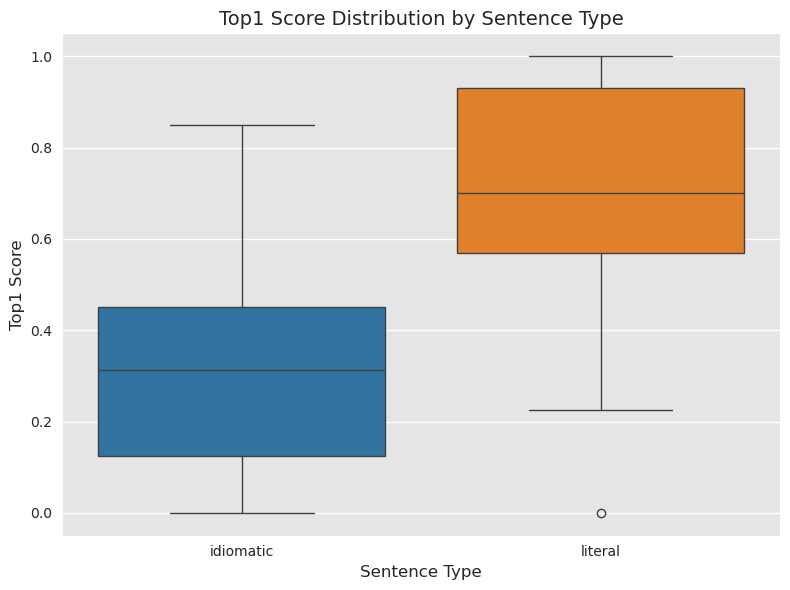

/tmp/ipykernel_36409/3180276184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_examples_avgs, x='sentence_type', y=metric, palette=['#1f77b4', '#ff7f0e'])


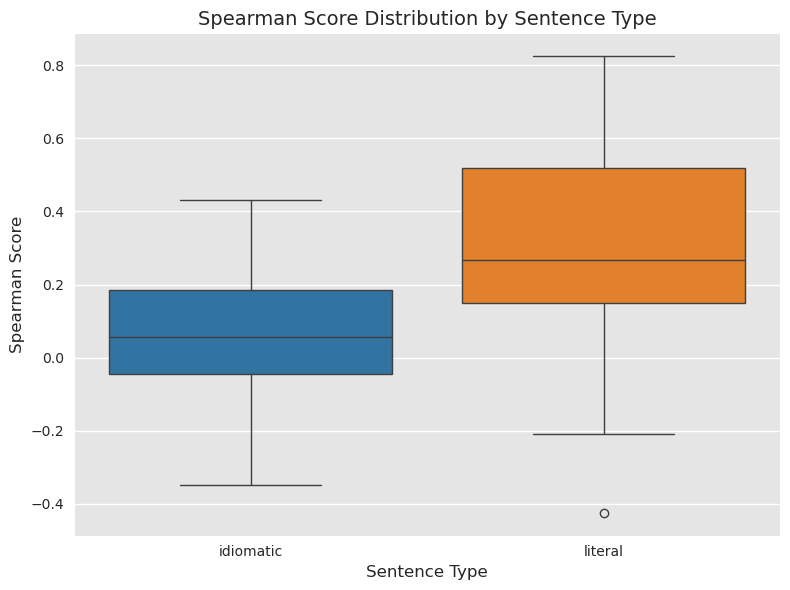

/tmp/ipykernel_36409/3180276184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_examples_avgs, x='sentence_type', y=metric, palette=['#1f77b4', '#ff7f0e'])


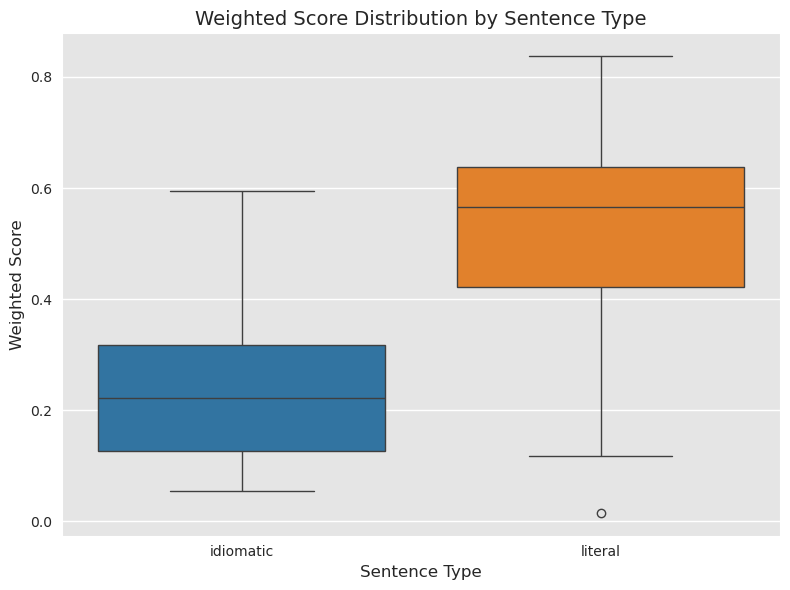

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for visualization
metrics = ['top1_score', 'spearman_score', 'weighted_score']

# Plot boxplots for each metric by sentence type
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=all_examples_avgs, x='sentence_type', y=metric, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'{metric.replace("_", " ").title()} Distribution by Sentence Type', fontsize=14)
    plt.xlabel('Sentence Type', fontsize=12)
    plt.ylabel(metric.replace("_", " ").title(), fontsize=12)
    plt.tight_layout()
    plt.savefig(f'viz/distribution_by_sentence_type_{metric}.png')
    plt.show()


In [92]:
import seaborn as sns

# Set Seaborn style to darkgrid for consistency with Matplotlib
sns.set_style("darkgrid")

# Optional: Also enable Matplotlib grid for compatibility
plt.rc('axes', facecolor='#e5e5e5')  # Light gray background for Matplotlib
plt.rc('grid', color='white', linewidth=1.0)  # White gridlines


In [93]:
# Scatter plot of top1_score with sentence type
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=all_examples_avgs,
    x='compound',
    y='top1_score',
    hue='sentence_type',
    palette=['#ff7f0e', '#1f77b4'],
    alpha=0.7,
    s=70
)
plt.xticks(rotation=90, fontsize=11)
plt.xlabel('Compound', fontsize=14)
plt.ylabel('Top-1 Accuracy', fontsize=14)
plt.title('Top-1 Accuracy by Compound and Sentence Type', fontsize=16)
plt.legend(title='Sentence Type', fontsize=12)
plt.tight_layout()
plt.savefig(f'viz/all_examples_scatter_avg_top1.png')
plt.show()


NameError: name 'all_examples_avgs' is not defined

<Figure size 1400x600 with 0 Axes>

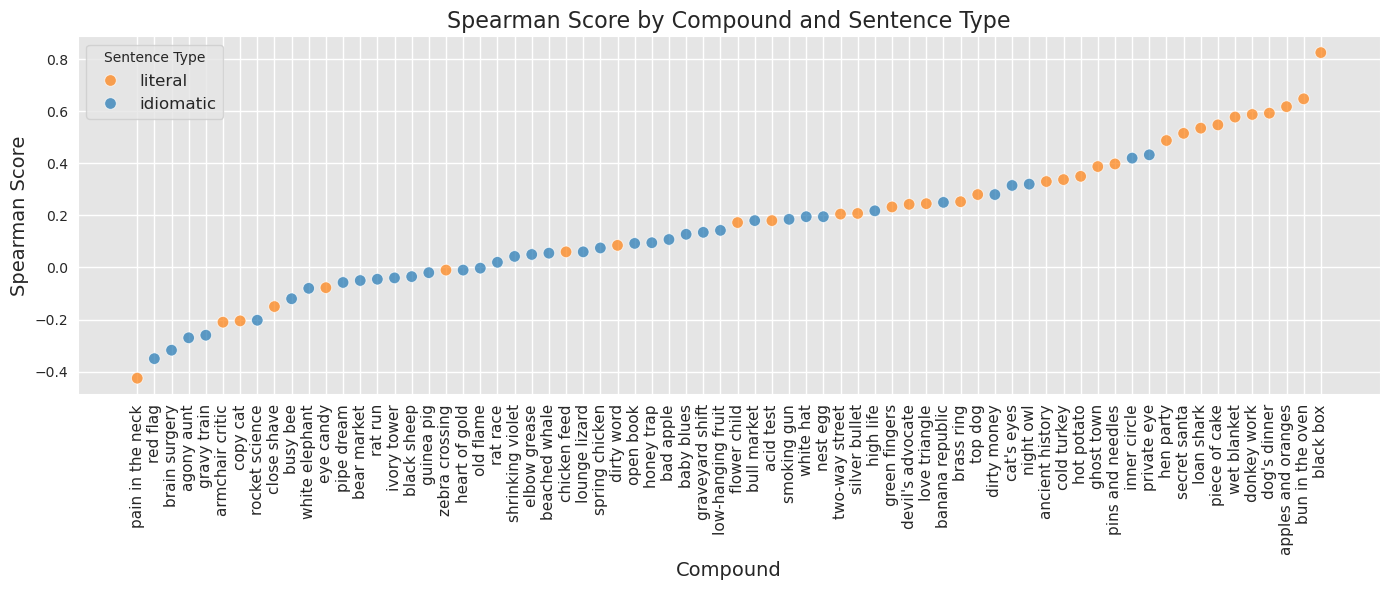

In [97]:
all_examples_avgs = all_examples_avgs.sort_values(by='spearman_score', ascending=True)

# Scatter plot of top1_score with sentence type
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=all_examples_avgs,
    x='compound',
    y='spearman_score',
    hue='sentence_type',
    palette=['#ff7f0e', '#1f77b4'],
    alpha=0.7,
    s=70
)
plt.xticks(rotation=90, fontsize=11)
plt.xlabel('Compound', fontsize=14)
plt.ylabel('Spearman Score', fontsize=14)
plt.title('Spearman Score by Compound and Sentence Type', fontsize=16)
plt.legend(title='Sentence Type', fontsize=12)
plt.tight_layout()
plt.savefig(f'viz/all_examples_scatter_avg_spearman.png')
plt.show()

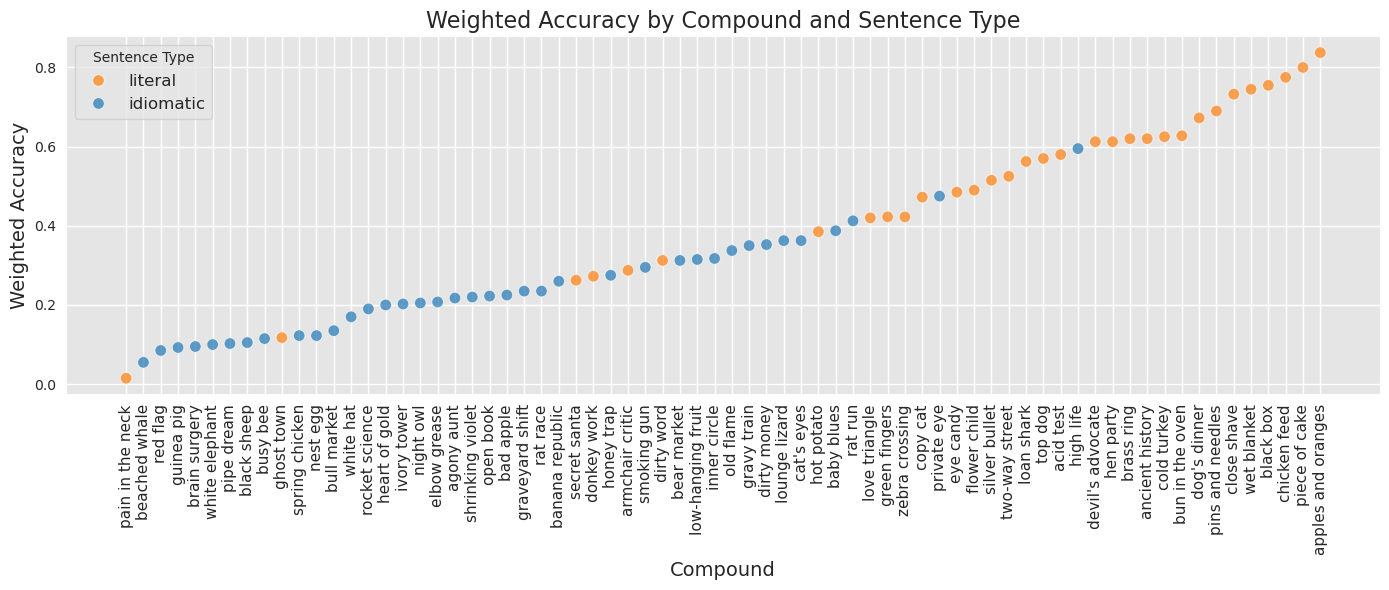

In [98]:
all_examples_avgs = all_examples_avgs.sort_values(by='weighted_score', ascending=True)

# Scatter plot of top1_score with sentence type
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=all_examples_avgs,
    x='compound',
    y='weighted_score',
    hue='sentence_type',
    palette=['#ff7f0e', '#1f77b4'],
    alpha=0.7,
    s=70
)
plt.xticks(rotation=90, fontsize=11)
plt.xlabel('Compound', fontsize=14)
plt.ylabel('Weighted Accuracy', fontsize=14)
plt.title('Weighted Accuracy by Compound and Sentence Type', fontsize=16)
plt.legend(title='Sentence Type', fontsize=12)
plt.tight_layout()
plt.savefig(f'viz/all_examples_scatter_avg_weighted.png')
plt.show()


# # Sort the data by weighted_score
# worst_examples_sorted = all_examples_avgs.sort_values(by='weighted_score', ascending=True)

# # Scatter plot for weighted_score with fixed colors
# plt.figure(figsize=(12, 6))
# sns.scatterplot(
#     data=worst_examples_sorted,
#     x='compound',
#     y='weighted_score',
#     hue='sentence_type',
#     hue_order=['literal', 'idiomatic'],  # Explicit order
#     palette={'literal': '#ff7f0e', 'idiomatic': '#1f77b4'},  # Fixed colors
#     alpha=0.7
# )
# plt.xticks(rotation=90, fontsize=10)
# plt.xlabel('Compound (Sorted by Weighted Score)', fontsize=12)
# plt.ylabel('Weighted Score', fontsize=12)
# plt.title('Weighted Score by Compound and Sentence Type', fontsize=14)
# plt.legend(title='Sentence Type', fontsize=10)
# plt.tight_layout()
# plt.savefig(f'viz_plots/all_examples_scatter_avg_weighted.png')
# plt.show()


In [ ]:
len(data)

2450

/tmp/ipykernel_36409/1184381125.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentence Type', fontsize=10)


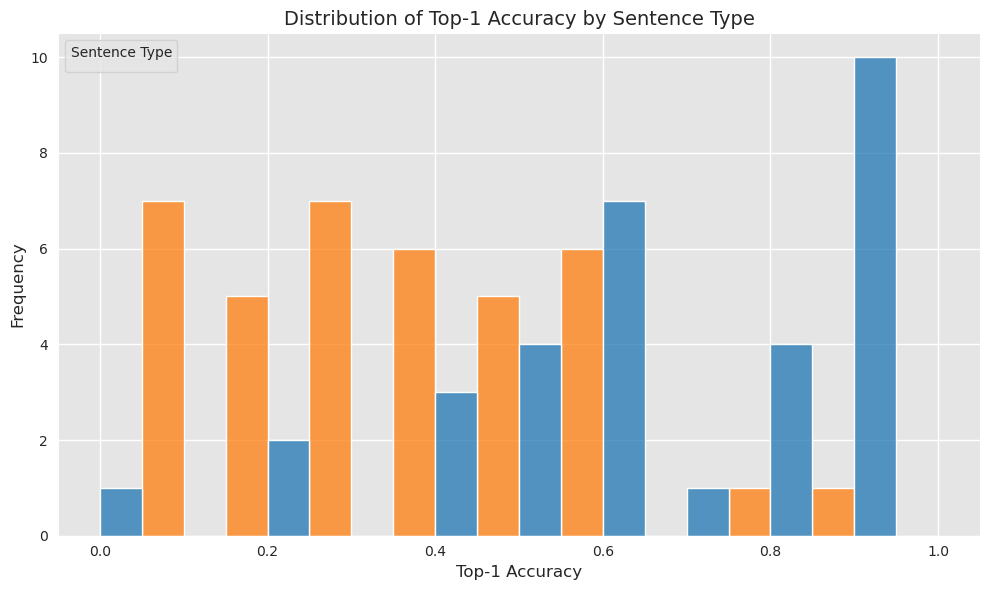

In [100]:
# Histogram of top1_score with sentence type
plt.figure(figsize=(10, 6))
sns.histplot(data=all_examples_avgs, x='top1_score', hue='sentence_type', bins=10, multiple='dodge', palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Top-1 Accuracy by Sentence Type', fontsize=14)
plt.xlabel('Top-1 Accuracy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Sentence Type', fontsize=10)
plt.tight_layout()
plt.savefig(f'viz/distribution_bins_by_sentence_type_top1.png')
plt.show()


### Download files

In [ ]:
!zip -r viz_plots.zip viz_plots

  adding: viz_plots/ (stored 0%)
  adding: viz_plots/all_examples_scatter_avg_top1.png (deflated 10%)
  adding: viz_plots/distribution_bins_by_sentence_type_top1.png (deflated 21%)
  adding: viz_plots/experiments_comparison_bar_top1.png (deflated 15%)
  adding: viz_plots/literal_vs_fig_by_experiment_top1.png (deflated 17%)
  adding: viz_plots/all_examples_scatter_avg_weighted.png (deflated 10%)
  adding: viz_plots/experiments_comparison_bar_weighted.png (deflated 15%)
  adding: viz_plots/all_examples_scatter_avg_spearman.png (deflated 10%)
  adding: viz_plots/literal_vs_fig_by_model_top1.png (deflated 18%)
  adding: viz_plots/distribution_by_sentence_type_top1_score.png (deflated 21%)
  adding: viz_plots/distribution_by_sentence_type_weighted_score.png (deflated 19%)
  adding: viz_plots/models_comparison_bar_top1.png (deflated 14%)
  adding: viz_plots/experiments_comparison_bar_spearman.png (deflated 15%)
  adding: viz_plots/distribution_by_sentence_type_spearman_score.png (deflated 19

In [ ]:
from google.colab import files
files.download('viz_plots.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>